In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
nope = pd.read_csv('Data/Production_Data.csv')

In [3]:
nope['Date'] = ''
nope['Time'] = ''

for index, row in nope.iterrows():
    nope.at[index, 'Date'] = nope['Human Time'].values[index].split(' ')[0]
    nope.at[index, 'Time'] = nope['Human Time'].values[index].split(' ')[1]
nope.head()

,Unnamed: 0,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,Date,Time
0,0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY,2020-01-02,09:35:00
1,1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY,2020-01-02,09:40:00
2,2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY,2020-01-02,09:45:00
3,3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY,2020-01-02,09:50:00
4,4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY,2020-01-02,09:55:00


In [4]:
nope['Day'] = ''

for index, row in nope.iterrows():
    year, month, day = nope['Date'].values[index].split('-')
    nope.at[index, 'Day'] = datetime.date(int(year), int(month), int(day)).strftime("%A")
    
nope.head()

,Unnamed: 0,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,Date,Time,Day
0,0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY,2020-01-02,09:35:00,Thursday
1,1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY,2020-01-02,09:40:00,Thursday
2,2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY,2020-01-02,09:45:00,Thursday
3,3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY,2020-01-02,09:50:00,Thursday
4,4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY,2020-01-02,09:55:00,Thursday


In [80]:
nope['Test'] = ''
single_day = 'Friday'
for index, row in nope.iterrows():
    if nope['Day'].values[index] == single_day:
        nope.at[index, 'Test'] = '1'

nope_temp = nope[nope['Test'] == '1']
mean_daily_nope = nope_temp.groupby(['Time']).mean()

In [81]:
mean_daily_nope['nope_sma5'] = mean_daily_nope['NOPE'].rolling(5,min_periods=1).mean()
mean_daily_nope['std5'] = mean_daily_nope['NOPE'].rolling(5,min_periods=1).std()
mean_daily_nope['nope_ema'] = mean_daily_nope['NOPE'].ewm(alpha =0.1, adjust = False).mean()

In [82]:
start = mean_daily_nope['NOPE'].values[0].round(3)
end = mean_daily_nope['NOPE'].values[-1].round(3)

print(single_day)
print("Start:", start)
print("End:", end)
temp = (((abs(start) - abs(end))/abs(start)))
print("Correction:", (abs(start) - abs(end)).round(3))
print("Correction %: {0:.3%}".format(temp))

Friday
Start: 3.142
End: -0.326
Correction: 2.816
Correction %: 89.624%


Start: 1.949
End: 0.545
Correction: 1.404
Correction %: 72.037%


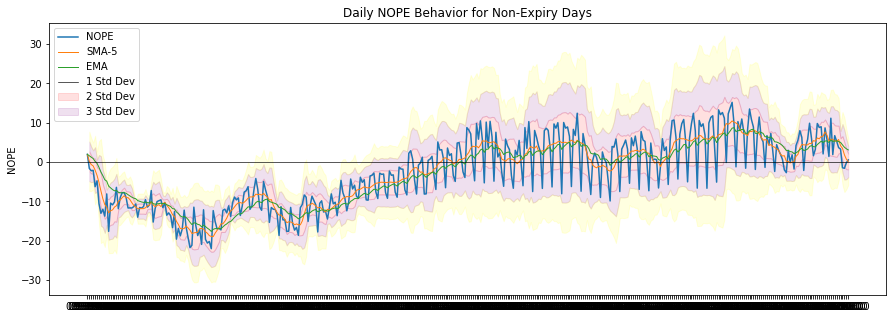

In [62]:
ax = plt.figure(figsize=(15,5))
x = mean_daily_nope.index
plt.plot(x, mean_daily_nope['NOPE'])
plt.plot(x, mean_daily_nope['nope_sma5'], lw = 1)
plt.plot(x, mean_daily_nope['nope_ema'], lw = 1)

plt.axhline(0, color = 'black', lw = 0.65)

sma = mean_daily_nope['nope_sma5']
std = mean_daily_nope['std5']
over = mean_daily_nope['nope_sma5'] + mean_daily_nope['std5']
under = mean_daily_nope['nope_sma5'] - mean_daily_nope['std5']

plt.fill_between(x, sma - std, sma + std, color = 'red', alpha= 0.12)

plt.fill_between(x, sma - std*2, sma - std, color = 'purple', alpha= 0.12)
plt.fill_between(x, sma + std, sma + std*2, color = 'purple', alpha= 0.12)

plt.fill_between(x, sma - std*2, sma - std*3, color = 'yellow', alpha= 0.12)
plt.fill_between(x, sma + std*2, sma + std*3, color = 'yellow', alpha= 0.12)

plt.title('Daily NOPE Behavior for Non-Expiry Days')
plt.ylabel('NOPE')
plt.legend(['NOPE','SMA-5','EMA','1 Std Dev', '2 Std Dev', '3 Std Dev'])

start = mean_daily_nope['NOPE'].values[0].round(3)
end = mean_daily_nope['NOPE'].values[-1].round(3)

print("Start:", start)
print("End:", end)
temp = (((abs(start) - abs(end))/abs(start)))
print("Correction:", (abs(start) - abs(end)).round(3))
print("Correction %: {0:.3%}".format(temp))

In [83]:
data = {'Day':  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
        'Correction': [-13.21, -14.694, -8.542, -2.817, 2.816],
        'Correction %': [-3978.916, -873.603, -383.221, -616.411, 89.624]
       }
df = pd.DataFrame(data, columns = ['Day','Correction', 'Correction %'])

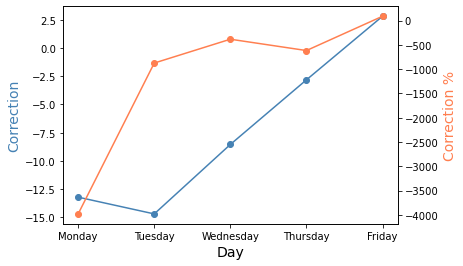

In [142]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df.Day, df.Correction, color="steelblue", marker="o")
# set x-axis label
ax.set_xlabel("Day",fontsize=14)
# set y-axis label
ax.set_ylabel("Correction",color="steelblue",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.Day, df['Correction %'],color="coral",marker="o")
ax2.set_ylabel("Correction %",color="coral",fontsize=14)
plt.show()